### 一,加载模块

In [37]:

import xgboost as xgb
import numpy as np
import scipy
import pandas as pd
from xgboost import plot_importance
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, precision_score, recall_score


### 二，数据加载

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# data=pd.read_csv('/home/maolp/data2/Immu_age/Immuageroot/Root_A05.Count_table/Root_A05.combat_eata.txt',sep='\t',header=0)
data=pd.read_csv('/home/maolp/data2/Immu_age/xiao/20220430_xiaoraw/xiao_A05.Count_table/xiao_A05.combat_eata.txt',sep='\t',header=0)
targetdata=pd.read_csv('/home/maolp/data2/Immu_age/xiao/20220430_xiaoraw/xiao_A05.Count_table/xiao_mergecoldata.txt',sep='\t')

In [5]:
data
targetdata

,name,age,gender,real_name,batch
0,A1_FRAS220068282-1r,20,0,吴广杰,4
1,A2_FRAS220068283-1r,20,1,王子健,4
2,A3_FRAS220068284-1r,30,0,高文,4
3,A4_FRAS220068285-1r,20,1,王昊云,4
4,A5_FRAS220068286-1r,20,0,邱明慧,4
...,...,...,...,...,...
91,OF2,86,0,OF2,3
92,OF4,86,0,OF4,3
93,OF3,87,0,OF3,3
94,OM4,88,1,OM4,3


In [6]:
targetdata["newage"]=np.where(targetdata["age"]<10,0,
                        np.where(targetdata["age"]<20,1,
                        np.where(targetdata["age"]<30,2,
                        np.where(targetdata["age"]<40,3,
                        np.where(targetdata["age"]<50,4,
                        np.where(targetdata["age"]<60,5,
                        np.where(targetdata["age"]<70,6,
                        np.where(targetdata["age"]<80,7,
                        np.where(targetdata["age"]<90,8,
                        np.where(targetdata["age"]<100,9,
                        np.where(targetdata["age"]<110,10,11)))))))))))

In [7]:
features=data.T


target=targetdata['age']
features2=features.iloc[10:96,]
features3=features.iloc[0:10,]
target=targetdata['age']

targetdata.index=targetdata['name']
targetdata2=targetdata.iloc[10:96,]

target.index=targetdata['name']

target
tagrget_age=targetdata2['age']
if list(features2.index)!=list(targetdata2.index):
    print('not ok')
else:
    print("ojbk")

ojbk


### 三,特征选择

In [11]:
from sklearn.linear_model import Lasso

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
features_standard=scaler.fit_transform(features)
regressor=Lasso(alpha=0.05)
model_lasso=regressor.fit(features_standard,targetdata['newage'])

In [12]:
features_standard2=pd.DataFrame(features_standard,index=features.index,columns=features.columns)
features_last=features_standard2.loc[:,model_lasso.coef_>0]

In [14]:
features_standard2["FAS"]

A1_FRAS220068282-1r    1.501660
A2_FRAS220068283-1r   -0.384452
A3_FRAS220068284-1r   -0.157479
A4_FRAS220068285-1r   -0.066090
A5_FRAS220068286-1r    0.709279
                         ...   
OF2                   -0.371864
OF4                    1.907981
OF3                    0.081417
OM4                   -0.825454
OF5                    1.746986
Name: FAS, Length: 96, dtype: float64

In [18]:
### 3.1 特征绘图

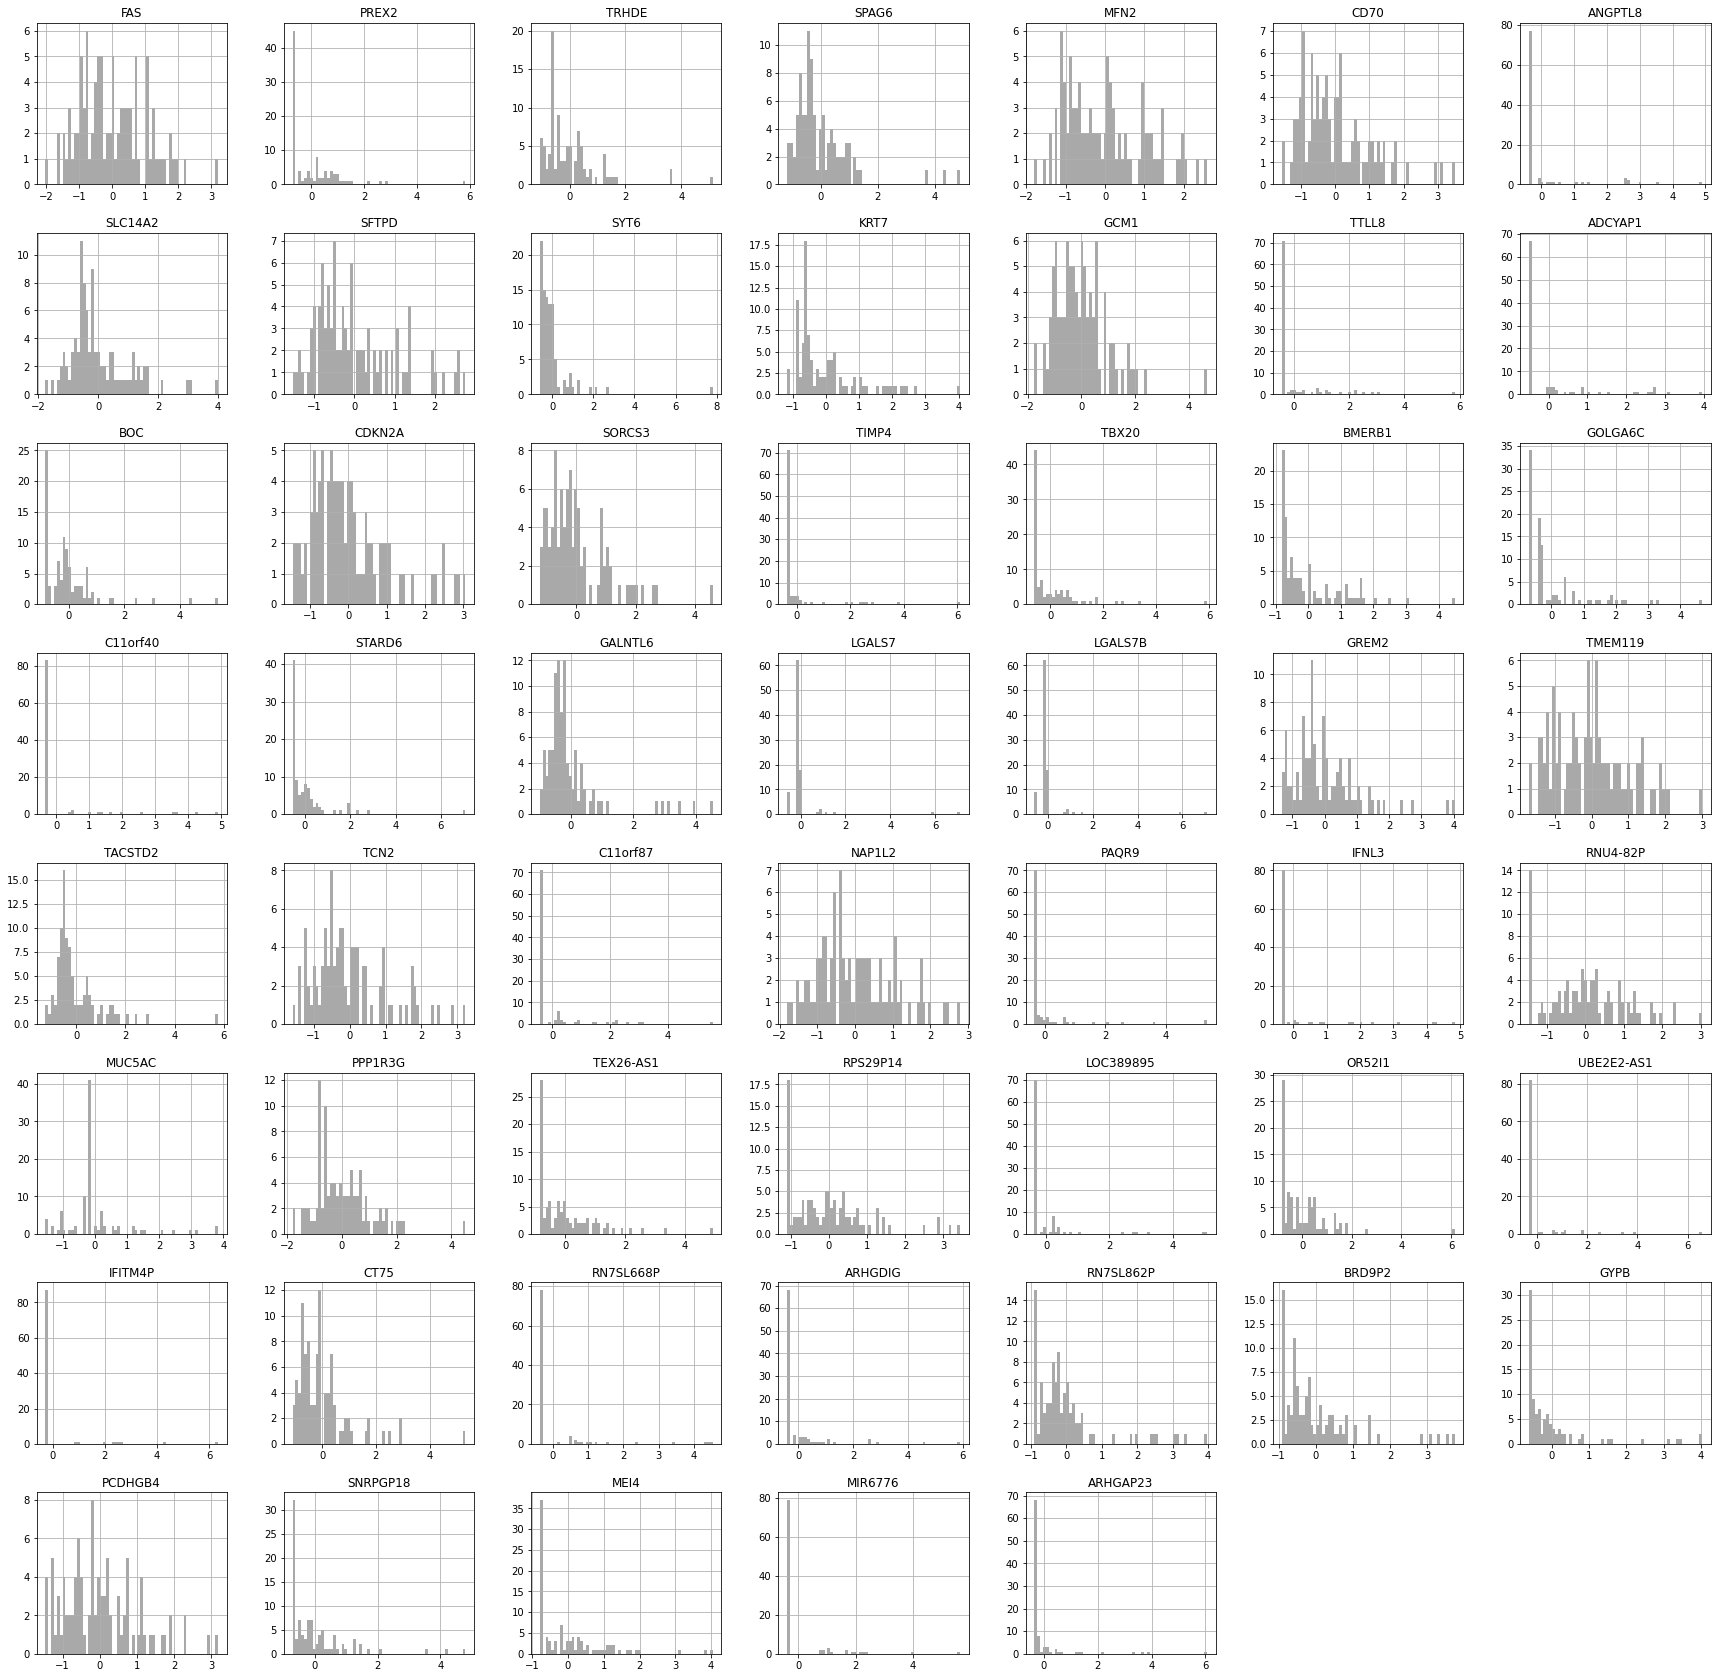

In [15]:
features_last.hist(bins = 60, figsize = (30,30),color=("darkgrey"))
plt.savefig('Immuaging_gene_plot.png', dpi=600, bbox_inches='tight')#输出
plt.show()

In [19]:
features_last2=features_last
features_last2.loc[:,"age"]=targetdata2['newage']

/home/maolp/miniconda3/envs/immuage37/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
features_last2.shape

(96, 55)

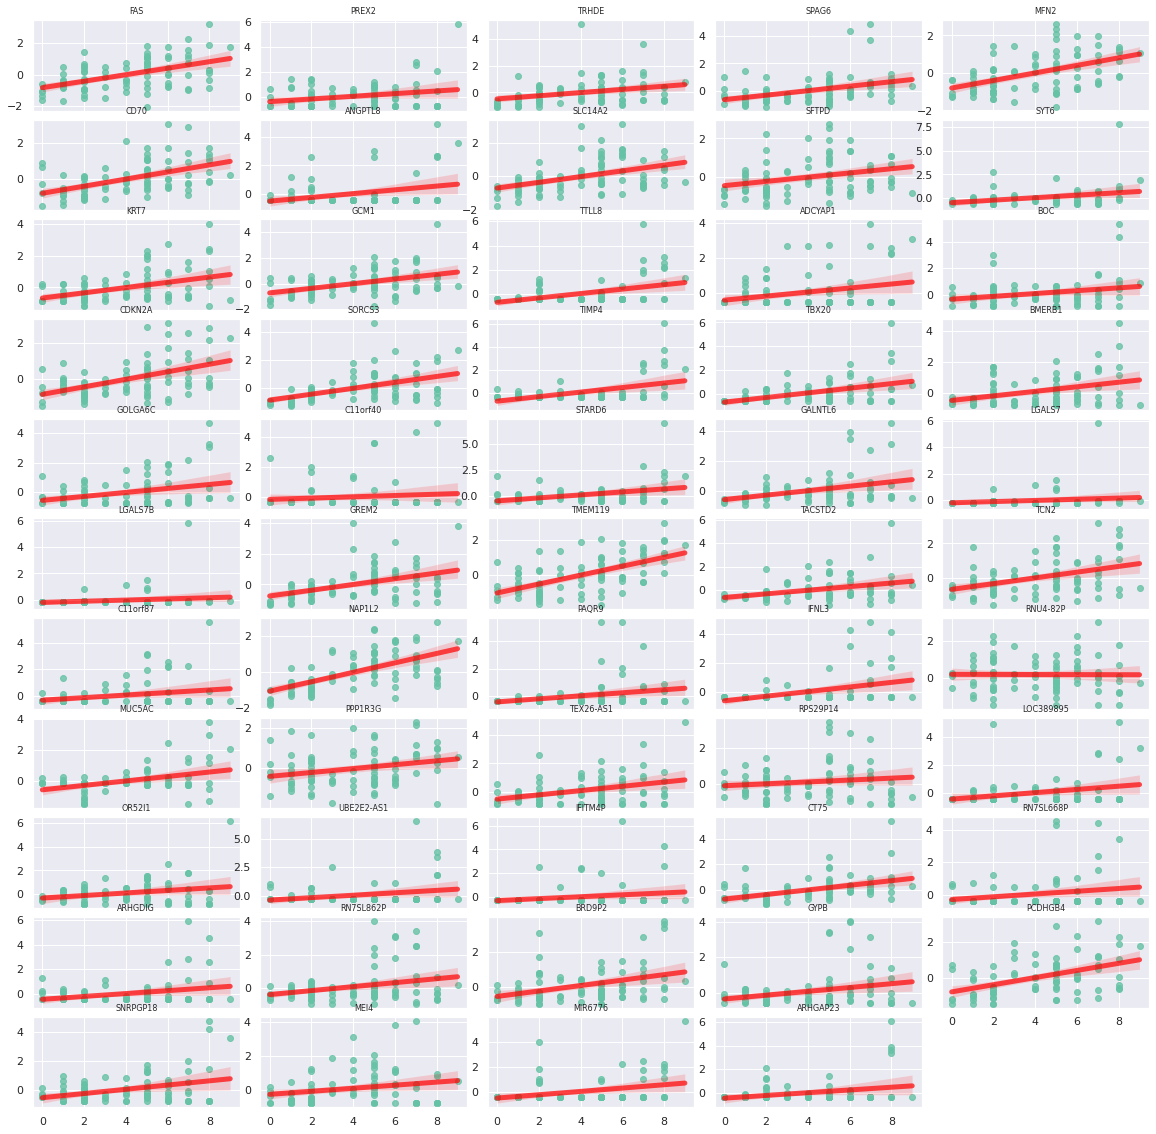

In [27]:
a=0
sns.set(palette="Set2", color_codes=True)
fig, axes = plt.subplots(10, 10, sharex=False, sharey=False, figsize=(20, 20))
for i in range(0,features_last2.shape[1]-1):
    a+=1
    plt.subplot(11, 5, a)
    plt.subplots_adjust(hspace=0.1,wspace=0.1)
    # print(features_last2.columns[i])
    
    # plt.figure(figsize=(15, 10))
    
    # plt.subplot(3,4,1)
    # plt.subplot(20,4,i+1)
    # fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    # fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
    plt.title(features_last2.columns[i],fontsize=8)
    sns.regplot(x=features_last2["age"],y= features_last2[str(features_last2.columns[i])], line_kws={"color":"r","alpha":0.7,"lw":5})
    plt.xlabel("")
    plt.ylabel("")   

plt.savefig('Immuaging_gene_plot_age2.png', dpi=600, bbox_inches='tight')#输出

In [28]:
### 4,模型训练

In [30]:
### 4.1 数据分割

In [31]:
data_train,data_test,target_train,target_test=train_test_split(features_last2,targetdata["newage"],test_size=0.2,random_state=0)

In [33]:
data_val_train,data_val_test,target_val_train,target_val_test=train_test_split(data_train,target_train,test_size=0.5,random_state=0)

In [40]:
xgboost_clf = XGBClassifier(min_child_weight=6,max_depth=15,
                                objective='multi:softmax',num_class=12)
xgboost_clf.fit(data_train, target_train)

/home/maolp/miniconda3/envs/immuage37/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:52:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=15,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=96, num_class=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
y_pred = xgboost_clf.predict(data_test)

In [42]:
y_pred

array([2, 2, 2, 1, 5, 2, 5, 2, 0, 2, 5, 5, 5, 8, 2, 7, 2, 1, 5, 2])

In [45]:
target_test

name
SRR13187025            2
YF4                    2
A3_FRAS220068284-1r    3
SRR13187057            0
SRR13639980            5
YM1                    2
SRR13187014            6
YF2                    2
SRR13187056            4
SRR13187072            2
SRR13187055            5
OM5                    7
SRR13639983            5
SRR13187011            3
A8_FRAS220068289-1r    4
SRR13187030            4
SRR13187020            2
SRR13187022            1
SRR13187033            7
A9_FRAS220068290-1     4
Name: newage, dtype: int64

In [47]:
def print_precison_recall_f1(y_true, y_pre):
    """打印精准率、召回率和F1值"""
    print("打印精准率、召回率和F1值")
    print(classification_report(y_true, y_pre))
    f1 = round(f1_score(y_true, y_pre, average='macro'), 2)
    p = round(precision_score(y_true, y_pre, average='macro'), 2)
    r = round(recall_score(y_true, y_pre, average='macro'), 2)
    print("Precision: {}, Recall: {}, F1: {} ".format(p, r, f1))

In [ ]:
print_precison_recall_f1(target_test,y_pred)

In [ ]:
### 五,年轻年老的分类

In [50]:
data_train,data_test,target_train,target_test=train_test_split(features_last2,targetdata["Youngold"],test_size=0.2,random_state=0)

In [49]:
targetdata["Youngold"]=np.where(targetdata["age"]<65,0,1)


In [55]:
dataYO_train,dataYO_test,targetYO_train,targetYO_test=train_test_split(features_last2,targetdata["Youngold"],test_size=0.2,random_state=0)

In [56]:
xgboost_clf = XGBClassifier(min_child_weight=6,max_depth=15,
                                objective='binary:logistic')
xgboost_clf.fit(dataYO_train, targetYO_train)

[16:08:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=15,
              min_child_weight=6, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=96, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [57]:
precision_score(targetYO_test, xgboost_clf.predict(dataYO_test), average='macro')

0.7222222222222222

In [60]:
xgboost_clf.score(dataYO_test, targetYO_test)

0.9

In [62]:
features_last2.iloc[0:10,]

,FAS,PREX2,TRHDE,SPAG6,MFN2,CD70,ANGPTL8,SLC14A2,SFTPD,SYT6,...,ARHGDIG,RN7SL862P,BRD9P2,GYPB,PCDHGB4,SNRPGP18,MEI4,MIR6776,ARHGAP23,age
A1_FRAS220068282-1r,1.501660,-0.717378,-0.431371,-0.379511,0.016466,0.062396,-0.380873,-0.541035,-0.807796,-0.597722,...,-0.403466,-0.900095,-0.914214,-0.61313,-0.165450,-0.711221,-0.788102,-0.394749,-0.356802,NaN
A2_FRAS220068283-1r,-0.384452,-0.717378,-0.431371,-0.379511,0.421414,-1.174805,-0.380873,0.488014,-0.413280,-0.597722,...,-0.403466,-0.900095,-0.914214,-0.61313,-0.165450,-0.711221,-0.788102,-0.394749,-0.356802,NaN
A3_FRAS220068284-1r,-0.157479,-0.717378,-0.431371,-0.379511,-0.067548,-0.396957,-0.380873,-0.541035,-0.477443,-0.597722,...,-0.403466,-0.900095,-0.914214,-0.61313,-0.165450,-0.711221,-0.788102,-0.394749,-0.356802,NaN
A4_FRAS220068285-1r,-0.066090,-0.717378,-0.431371,-0.379511,0.260442,0.630811,-0.380873,-0.541035,-1.073754,-0.597722,...,-0.403466,-0.900095,-0.914214,-0.61313,0.221578,-0.711221,-0.788102,-0.394749,-0.356802,NaN
A5_FRAS220068286-1r,0.709279,-0.717378,-0.431371,1.309762,-0.688019,-0.281907,-0.380873,-0.206505,-0.075189,-0.597722,...,-0.403466,-0.900095,-0.914214,-0.61313,-0.165450,-0.711221,-0.788102,-0.394749,-0.356802,NaN
A6_FRAS220068287-1r,1.209904,-0.717378,-0.265200,0.260174,1.921315,-1.028911,-0.380873,-0.541035,-0.784999,-0.597722,...,-0.403466,-0.900095,-0.914214,-0.61313,0.891598,-0.711221,-0.788102,-0.394749,-0.356802,NaN
A7_FRAS220068288-1r,-0.007995,-0.717378,0.068013,0.821992,-0.182113,0.197632,-0.380873,-0.541035,-1.073754,-0.597722,...,-0.403466,-0.900095,-0.914214,-0.61313,-0.165450,-0.711221,-0.788102,-0.394749,-0.356802,NaN
A8_FRAS220068289-1r,-0.617417,-0.717378,-0.431371,-0.379511,-0.654672,3.491654,-0.380873,-0.541035,2.611808,-0.597722,...,-0.403466,-0.900095,-0.914214,-0.61313,-0.165450,-0.711221,-0.788102,-0.394749,-0.356802,NaN
A9_FRAS220068290-1,-1.319407,-0.717378,3.674862,-0.379511,-0.822743,1.219294,-0.380873,4.003263,2.547982,-0.597722,...,-0.403466,-0.900095,-0.914214,-0.61313,-0.165450,-0.711221,-0.788102,-0.394749,-0.356802,NaN
A10_FRAS220068291-2r,-1.290143,-0.717378,-0.431371,-0.379511,-0.735668,-1.191148,-0.380873,-0.215237,1.205233,-0.597722,...,-0.403466,-0.900095,-0.914214,-0.61313,-0.165450,-0.711221,-0.788102,-0.394749,-0.356802,NaN


In [63]:
targetYO_test

name
SRR13187025            0
YF4                    0
A3_FRAS220068284-1r    0
SRR13187057            0
SRR13639980            0
YM1                    0
SRR13187014            0
YF2                    0
SRR13187056            0
SRR13187072            0
SRR13187055            0
OM5                    1
SRR13639983            0
SRR13187011            0
A8_FRAS220068289-1r    0
SRR13187030            0
SRR13187020            0
SRR13187022            0
SRR13187033            1
A9_FRAS220068290-1     0
Name: Youngold, dtype: int64

In [61]:
xgboost_clf.predict(features_last2.iloc[0:10,])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [59]:
cross_val_score(xgboost_clf, features_last2, targetdata["Youngold"], cv=10, scoring='f1_macro')

/home/maolp/miniconda3/envs/immuage37/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:10:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/maolp/miniconda3/envs/immuage37/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:10:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/maolp/miniconda3/envs/immuage37/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:10:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/maolp/miniconda3/envs/immuage37/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:10:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/maolp/miniconda3/envs/immuage37/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:10:53] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/maolp/miniconda3/envs/immuage37/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:10:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/maolp/miniconda3/envs/immuage37/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:11:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/maolp/miniconda3/envs/immuage37/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:11:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/maolp/miniconda3/envs/immuage37/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:11:18] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/maolp/miniconda3/envs/immuage37/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:11:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0.80392157, 0.86666667, 0.80392157, 0.41176471, 1.        ,
       0.41176471, 1.        , 0.8       , 0.75      , 0.8       ])